# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)
# cities.to_csv("weather 2", index=False, header=True)

['puerto ayora', 'gillette', 'punta arenas', 'tuktoyaktuk', 'gorontalo', 'pisco', 'port elizabeth', 'hobart', 'geraldton', 'gambela', 'yellowknife', 'bukavu', 'maniitsoq', 'kaitangata', 'qaanaaq', 'saint-louis', 'mataura', 'busselton', 'butaritari', 'pontianak', 'clyde river', 'adrar', 'pashiya', 'rikitea', 'viligili', 'coihaique', 'saint george', 'srednekolymsk', 'ambodifototra', 'saint-philippe', 'nyurba', 'ushuaia', 'avarua', 'saleaula', 'hithadhoo', 'georgetown', 'fortuna', 'vaini', 'alice springs', 'jamestown', 'puerto baquerizo moreno', 'carnarvon', 'salalah', 'atuona', 'lagoa', 'cape town', 'yar-sale', 'jaque', 'atambua', 'albany', 'port alfred', 'namibe', 'guerrero negro', 'riyadh', 'scottsburgh', 'leningradskiy', 'santa cruz', 'catia la mar', 'codrington', 'aksarka', 'kiruna', 'sorvag', 'broken hill', 'seoul', 'bredy', 'yumen', 'mys shmidta', 'prince rupert', 'korla', 'hervey bay', 'anloga', 'tasiilaq', 'kamenka', 'outjo', 'olga', 'asau', 'victoria', 'torit', 'deputatskiy', 'b

In [3]:
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "Metric"
query_url=f"{url}appid={api_key}&units={unit}&q="
# city = "Toronto"
# test= requests.get(query_url+city).json()
# test
lat =[]
lon =[]
city_name=[]
country=[]
date=[]
maxtemp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
for city in cities:
    data=requests.get(query_url+city).json()
    try:
        city_name.append(data['name'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        lat.append(data['coord']['lat'])
        lon.append(data['coord']['lon'])
        humidity.append(data['main']['humidity'])
        maxtemp.append(data['main']['temp_max'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
    except:
        print(f"the city name:{city}")            

the city name:viligili
the city name:ambodifototra
the city name:saleaula
the city name:jaque
the city name:scottsburgh
the city name:sorvag
the city name:mys shmidta
the city name:korla
the city name:asau
the city name:torit
the city name:urumqi
the city name:nizhneyansk
the city name:barentsburg
the city name:rungata
the city name:akyab
the city name:karamea
the city name:huazolotitlan
the city name:raga
the city name:andevoranto
the city name:belushya guba
the city name:illoqqortoormiut
the city name:grand river south east
the city name:sedelnikovo
the city name:amderma
the city name:toliary
the city name:sentyabrskiy
the city name:taolanaro
the city name:palabuhanratu
the city name:mwaya
the city name:tabiauea
the city name:ngukurr
the city name:sataua
the city name:atlantic city
the city name:svetlyy
the city name:falealupo
the city name:maykain
the city name:tumannyy
the city name:samusu
the city name:mrirt
the city name:ust-kamchatsk
the city name:gangotri
the city name:mouzakio

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
maxtemp_c=[] 
for i in maxtemp:
    maxtemp_c.append(i- 273.15)

dict = {"Latitude":lat,
        "Longitude":lon,
        "Cities":city_name,
        "Country":country,
        "Date":date,
        "Max Temp(C)":maxtemp_c,
        "Humidity(%)":humidity,
        "Cloudiness(%)":cloudiness,
        "Wind Speed(meter/sec)":wind_speed
       }
weather_data = pd.DataFrame(dict)
weather_data.to_csv("weather 2/weather_data.csv",index=False, header=True)
weather_data.count()


Latitude                 543
Longitude                543
Cities                   543
Country                  543
Date                     543
Max Temp(C)              543
Humidity(%)              543
Cloudiness(%)            543
Wind Speed(meter/sec)    543
dtype: int64

In [105]:
dict_pd.head()

,Latitude,Longitude,Cities,Country,Date,Max Temp(C),Humidity(%),Cloudiness(%),Wind Speed(meter/sec)
0,69.65,18.96,Tromso,NO,1572888689,-1.00,100,90,2.10
1,-33.21,138.60,Jamestown,AU,1572888587,4.73,95,0,1.63
2,-33.02,27.91,East London,ZA,1572888689,18.00,88,40,5.70
3,-53.16,-70.91,Punta Arenas,CL,1572888689,10.00,46,98,13.86
4,43.08,-73.79,Saratoga Springs,US,1572888689,10.56,49,90,4.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

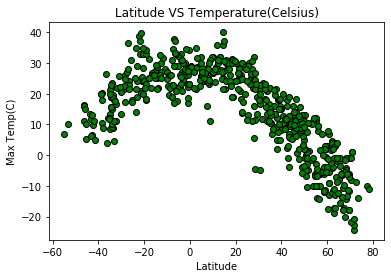

In [78]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temp(C)"],marker = "o",facecolors="green", edgecolors="black" )
plt.xlabel("Latitude")
plt.ylabel("Max Temp(C)")
plt.title('Latitude VS Temperature(Celsius)')
plt.savefig('weather 2/lat vs temp')
plt.show()

#### Latitude vs. Humidity Plot

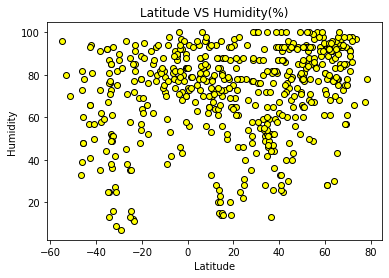

In [6]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity(%)"],marker = "o",facecolors="yellow", edgecolors="black" )
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Latitude VS Humidity(%)')
plt.savefig('weather 2/lat vs humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

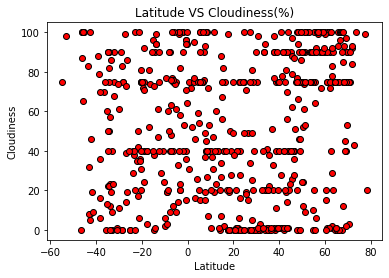

In [82]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness(%)"],marker = "o",facecolors="red", edgecolors="black" )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Latitude VS Cloudiness(%)')
plt.savefig('weather 2/lat vs Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

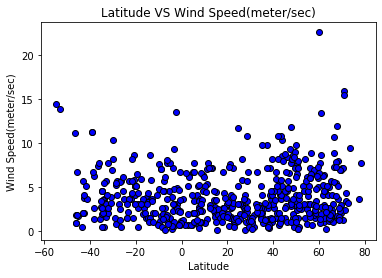

In [83]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed(meter/sec)"],marker = "o",facecolors="blue", edgecolors="black" )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(meter/sec)")
plt.title('Latitude VS Wind Speed(meter/sec)')
plt.savefig('weather 2/lat vs Wind Speed')
plt.show()